In [ ]:
import mujoco as mj
from mujoco.glfw import glfw
import numpy as np
import time as T

In [ ]:


###
"""
data.qpos=q0; data.qpos[1]=q1 #set position
mj_forward(model,data) # forward kinematics
data.site_xpos[0] #get site position
"""
####
scene=["vertical_arh_soft_scene.xml",'left_hand_light.xml',"small_deformable_soft_cube.xml"]
xml_path = scene[2] #xml file (assumes this is in the same folder as this file)
simend = 20 # Simulation time

In [ ]:
554-59
599-641



In [ ]:
# flex information
# Access the flexible vertex positions (FLEXVERT_XPOS)
flexvert_xpos = data.flexvert_xpos
print("Flexible Vertex Positions:")
print(flexvert_xpos)

# Access the axis-aligned bounding box for flex elements (FLEXELEM_AABB)
flexelem_aabb = data.flexelem_aabb
print("Flex Element AABB:")
print(flexelem_aabb)

# # Access the flex edge joint indices (FLEXEDGE_J)
# flexedge_j = data.FLEXEDGE_J
# print("Flex Edge Joint Indices:")
# print(flexedge_j)

# Access the flex edge lengths (FLEXEDGE_LENGTH)
flexedge_length = data.flexedge_length
print("Flex Edge Lengths:")
print(flexedge_length)
print(len(flexedge_length))


In [ ]:

# MuJoCo data structures
model = mj.MjModel.from_xml_path(xml_path)  # MuJoCo model
data = mj.MjData(model)                # MuJoCo data

In [ ]:
# Get the number of joints
def getJointInfo(model):
    num_joints = model.njnt
    print(num_joints)
    joint_info = []
    joint_dict={}
    index=0
    for i in range(num_joints):
        # joint_name = model.name_jntadr[i]
        joint_dict[str(i)]={
        "joint_index":index,
        "joint_body_id" : model.jnt_bodyid[i],
        "joint_id":i,
        "joint_type": model.jnt_type[i],
        "joint_axis" : model.jnt_axis[i]  }
        # joint_info.append((joint_index, joint_body_id, joint_type,joint_axis))
    return joint_dict
joint_dict=getJointInfo(model)
# print(joint_info)

In [ ]:
print(joint_dict)

In [ ]:

# Simulation loop
for i in range(10):
    # Step the simulation
    mj.mj_step(model, data)

    # Retrieve and print joint torque information
    joint_torques = data.qfrc_actuator + data.qfrc_applied + data.qfrc_bias
    print(f"Step {i}: Joint Torques: {joint_torques}")

    # Optional: Print individual components of the torque for detailed analysis
    print(f"Actuator Torques: {len(data.qfrc_actuator)}")
    print(f"Applied Torques: {data.qfrc_applied}")
    print(f"Passive Torques (Bias): {data.qfrc_bias}")


In [ ]:
# move joint forward kinematics
for x in range(len(joint_info)):
    if joint_info[x][1]==9:
        print(data.qpos[x])
        print(x)

In [ ]:
N = 500
simend=N
q0_start = 0 # starting angle
import math

def setPositionControl(joint_id,angle):
    q_start = 0
    q_end = math.radians(angle); # ending angle # 90 degrees-------------------
    q = np.linspace(q_start,q_end,N)
    data.qpos[joint_id] = q0_start;
    # print(q)
    return q
i = 0;
time = 0
dt = 0.001;
joint_move=[]
# for joint in range(16):
#     k=setPositionControl(joint,20)
#     joint_move.append(k)
#     print(len(k))
    # print(data.qpos)


In [ ]:
# move finger by some anlge

joint_id=6
q=setPositionControl(joint_id,0)
for x in range(simend):
    step_start = T.time()
    mj.mj_step(model, data)
    joint_angles = np.copy(data.qpos)
    joint_torques = np.copy(data.qfrc_actuator)
    data.qpos[joint_id] = q[x];
    # data.qpos[1] = q1[i];

    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print(f"angle {math.degrees(joint_angles[joint_id])}")
    
    # print(f"torque {joint_torques[joint_id]}")
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

    # print("Joint Angles:", joint_angles)
    # print("Joint Torques:", joint_torques)

In [ ]:
# print(len(data.xfrc_applied))

In [ ]:
##### body_dict
import xml.etree.ElementTree as ET
xml_path="left_hand_light.xml"
tree = ET.parse(xml_path)
root = tree.getroot()
body_dict = {}
joint_dict={}
body_id=0
joint_flag=False
for body in root.findall('.//body'):
        body_name = body.get('name')
        if body_name is None:
            continue
        # body.findall('joint')
        for joint in body.findall('joint'):
            joint_flag=True
            joint_name = joint.get('name')
            # print(joint_name)
            body_dict[body_id]={"body_name":body_name,
                               "body_id":body_id,
                                "joint_name": joint.get('name')
            # "joint_type" : joint.get('type'),
            # # joint_pos = joint.get('pos'),
            # # joint_axis = joint.get('axis')
            # "joint_range" : joint.get('range')
            }
        if not joint_flag: # if link is present
            body_dict[body_id]={"body_name":body_name,
                               "body_id":body_id}
        joint_flag=False
            
        body_id+=1


In [ ]:
print(body_dict)

In [ ]:
# # Function to get actuator information
# def get_actuator_info(model):
#     actuators = []

#     for i in range(model.nu):
#         # actuator_name = model.mj_id2name(i, mujoco.mjtObj.mjOBJ_ACTUATOR)
#         actuator_trnid = model.actuator_trnid[i]
#         actuator_joint_id = actuator_trnid[0]  # Assuming the actuator controls a joint
#         # actuator_joint_name = model.id2name(actuator_joint_id, mujoco.mjtObj.mjOBJ_JOINT)

#         actuators.append({
#             'id': i,
#             # 'name': actuator_name,
#             'joint_id': actuator_joint_id,
#             # 'joint_name': actuator_joint_name,
#             'gear': model.actuator_gear[i],
#             'bias': model.actuator_biasprm[i]
#         })

#     return actuators

# # Get actuator information
# actuators = get_actuator_info(model)

In [ ]:
# for body in root.findall('.//body'):
#         body_name = body.get('name')
#         if body_name is None:
#             continue
#         for joint in body.findall('ACTUATOR'):
#             joint_flag=True
#             joint_name = joint.get('name')
#             print(joint_name)

In [ ]:
# for actuator in root.findall('.//ACTUATOR'):
#     print(actuator)

In [ ]:
# print(actuator_info)

In [ ]:
# # actuator name:[actuator_id, joint_id] 
# actuator_lsit=["ffa0":[0],"ffa1":[1],"ffa2":[2],"ffa3":[3],
#                "mfa0":[4],"mfa1":[5],"mfa2":[6],"mfa3":[7],
#                "rfa0":[8],"rfa1":[9],"rfa2":[10],"rfa3":[11],
#                "tha0":[12],"tha1":[13],"tha2":[14],"tha3":[15]
# ]

# def get_actuator_info(model):
#     actuators = []

#     for i in range(model.nu):
#         # actuator_name = model.mj_id2name(i, mujoco.mjtObj.mjOBJ_ACTUATOR)
#         actuator_trnid = model.actuator_trnid[i]
#         actuator_joint_id = actuator_trnid[0]  # Assuming the actuator controls a joint
#         # actuator_joint_name = model.id2name(actuator_joint_id, mujoco.mjtObj.mjOBJ_JOINT)
#         # print(model.nu)
#         actuators.append({
#             'id': i,
#             # 'name': actuator_name,
#             'joint_id': actuator_joint_id
#             # 'joint_name': actuator_joint_name,
#             # 'gear': model.actuator_gear[i],
#             # 'bias': model.actuator_biasprm[i]
#         })

#     return actuators

# # Get actuator information
# actuators = get_actuator_info(model)
# print(actuators)

In [ ]:
# print(body_dict)
for key, value in enumerate(body_dict):
    if "joint_name" in body_dict[key]:
        # print(body_dict[key]["joint_name"])
        actuator_name=body_dict[key]["joint_name"].replace('j', 'a')
        body_dict[key]["actuator_name"]=actuator_name

In [ ]:
print(body_dict)

In [ ]:

# [actuator name,actuator_id, joint_id] 

actuator_list=[["ffa0",0,8],["ffa1",1,9],["ffa2",2,10],["ffa3",3,11],
           ["mfa0",4,4],["mfa1",5,5],["mfa2",6,6],["mfa3",7,7],
        ["rfa0",8,0],["rfa1",9,1],["rfa2",10,2],["rfa3",11,3],
           ["tha0",12,12],["tha1",13,13],["tha2",14,14],["tha3",15,15]]
def actuator_key(act_name):

    # index_found=False
    for index in range(len(actuator_list)):
        if actuator_list[index][0]==act_name:
            # print(index)
            return index
        
for key,value in enumerate(body_dict):
    if 'actuator_name' in body_dict[key].keys():
        # print(body_dict[key]['actuator_name'])        
        ind=actuator_key(body_dict[key]['actuator_name'])
        print(actuator_list[ind])
        body_dict[key]['actuator_id']=actuator_list[ind][1]
        body_dict[key]['joint_id']=actuator_list[ind][2]

In [ ]:
print(body_dict)

In [ ]:
import json


# Save dictionary to JSON file
def save_dict_to_json(dictionary, filename):
    with open(filename, 'w') as json_file:
        json.dump(dictionary, json_file, indent=4)

# Load dictionary from JSON file
def load_dict_from_json(filename):
    with open(filename, 'r') as json_file:
        dictionary = json.load(json_file)
    return dictionary

# Save dict to a JSON file
save_dict_to_json(body_dict, 'body_dict.json')

# Load the dict frm JSON file
loaded_dict = load_dict_from_json('body_dict.json')

# loaded dict
print(loaded_dict)

In [ ]:
# import math

#initialize the controller
def set_position_servo(actuator_no, kp=10):
    bend_angle=20
    model.actuator_gainprm[actuator_no,0]=kp
    model.actuator_biasprm[actuator_no,1]=-kp
    data.ctrl=math.radians(bend_angle)

# target_actuator="ffa1"

def actuator_name2id(actuator_name):
    actuator_id=None
    for key, value in enumerate(body_dict):
         if "actuator_name" in body_dict[key]:
            if body_dict[key]["actuator_name"]==actuator_name:
            # actuator_name=body_dict[key]["joint_name"].replace('j', 'a')
                actuator_id=body_dict[key]["actuator_id"]
                return actuator_id





def controller(model,data):
    # spring like behaviour
    actuator_name="ffa1"
    actuator_id=actuator_name2id(actuator_name)
    set_position_servo(actuator_id,10)



#set the controller
mj.set_mjcb_control(controller)


def init_controller(model,data):
    pass





In [ ]:
joint_id=13
for x in range(simend):
    step_start = T.time()
    mj.mj_step(model, data)
    joint_angles = np.copy(data.qpos)
    joint_torques = np.copy(data.qfrc_actuator)
    # data.qpos[6] = q0[x];
    # data.qpos[1] = q1[i];

    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    print(f"angle {math.degrees(joint_angles[joint_id])}")
    
    print(f"torque {joint_torques[joint_id]}")
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

    # print("Joint Angles:", joint_angles)
    # print("Joint Torques:", joint_torques)

In [1]:
import cv2

In [1]:
!nvidia-smi

Fri Jul 19 09:24:13 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A4000               Off |   00000000:3B:00.0  On |                  Off |
| 41%   46C    P8             16W /  140W |    1485MiB /  16376MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

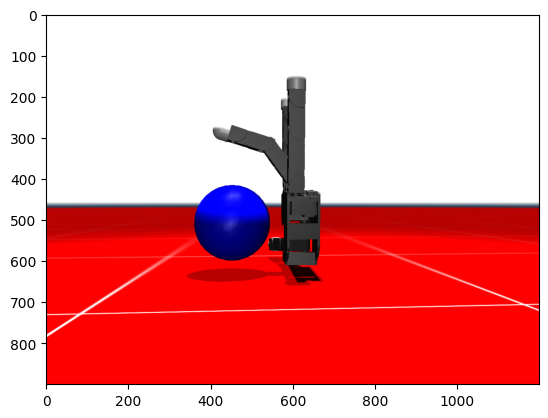

In [4]:
img=io.imread("blue.png")
plt.imshow(img)

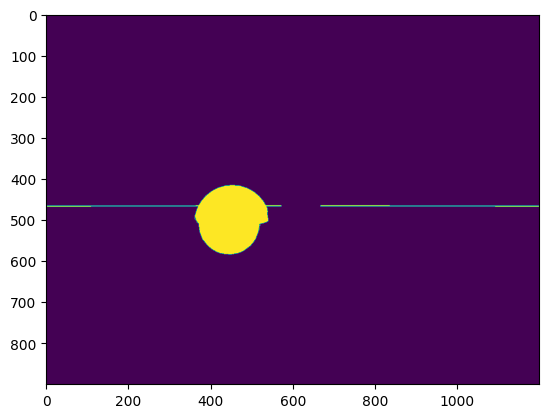

In [6]:
hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
mask=cv2.inRange(hsv,(100,90,90),(120,255,255))
plt.imshow(mask)

In [7]:
from scipy import ndimage as nd
closed_mask=nd.binary_closing(mask,np.ones((7,7)))

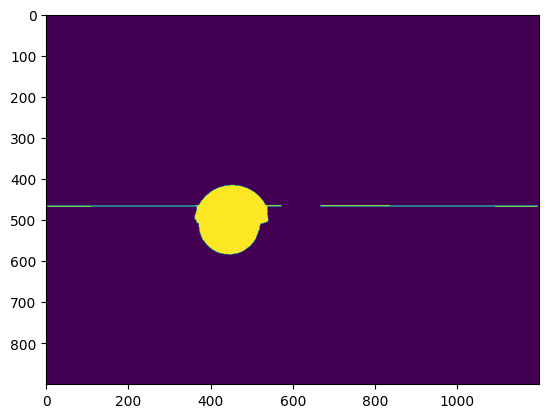

In [9]:
plt.imshow(closed_mask)

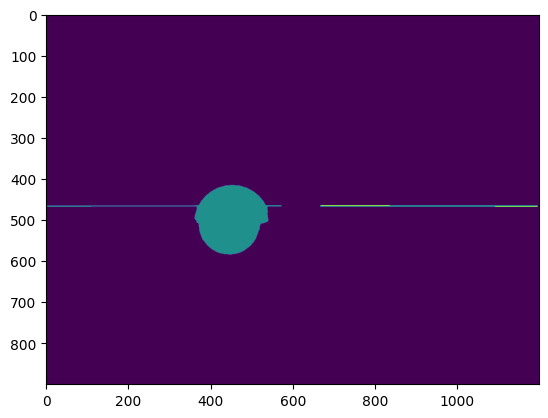

In [14]:

label_image=measure.label(closed_mask)
plt.imshow(label_image)

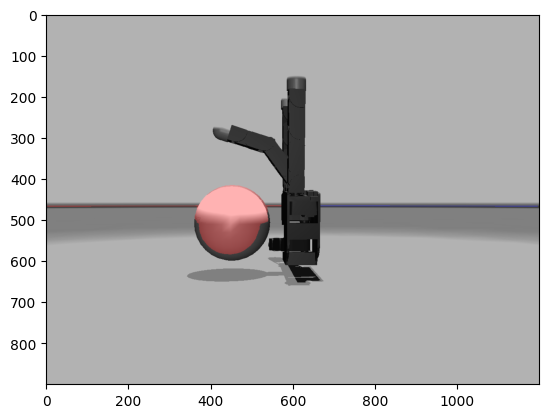

In [17]:
from skimage.color import label2rgb
image_label_overlay=label2rgb(label_image,image=img)
0-plt.imshow(image_label_overlay)

In [20]:
props=measure.regionprops_table(label_image,img, spacing=1.2, properties=['label', "area", "equivalent_diameter","mean_intensity","solidity"])
import pandas as pd
df=pd.DataFrame(props)
print(df.head())

# props = regionprops(image2d, spacing=1.2)  # 1.2µm/pix
# print(f'label {props[0].label} has area {props[0].area}µm2'

   label      area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0      1  33340.32           206.034497          6.845204          7.760420   
1      2   1916.64            49.399816         57.066867         80.584523   

   mean_intensity-2  solidity  
0         179.08297  0.443128  
1         103.53719  0.772490  


In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

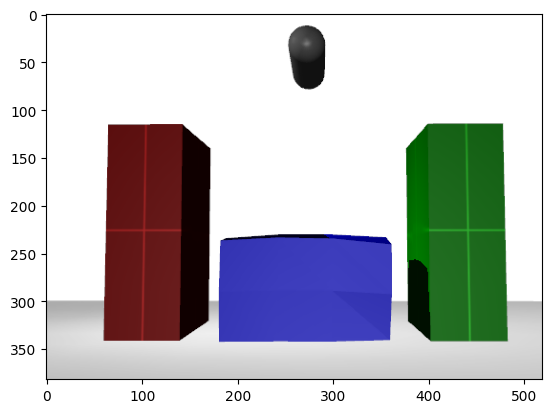

In [3]:
img=io.imread("z_test_sample1.png")
plt.imshow(img)

In [4]:
img_name=["z_test_sample1.png","z_test_sample2.png","z_test_sample3.png","z_test_sample4.png"]

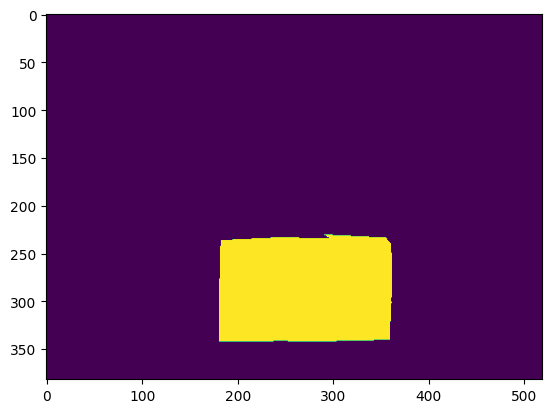

In [5]:
hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
mask=cv2.inRange(hsv,(100,90,90),(120,255,255))
plt.imshow(mask)

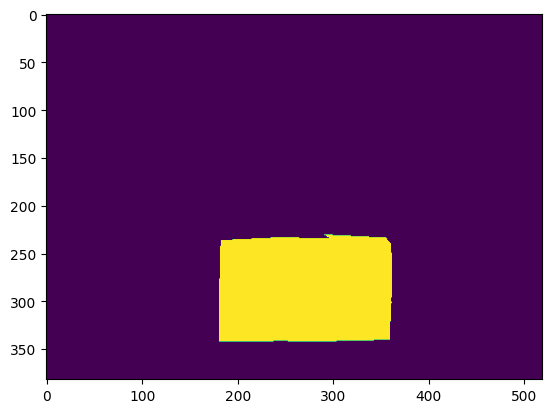

In [6]:
label_image=measure.label(mask)
plt.imshow(label_image)

In [8]:
props=measure.regionprops_table(label_image,img, spacing=1.2, properties=['label', "area", "equivalent_diameter","mean_intensity","solidity"])
import pandas as pd
df=pd.DataFrame(props)
print(df.head())

   label      area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0      1  27995.04           188.797225         57.421223         57.421223   

   mean_intensity-2  mean_intensity-3  solidity  
0        184.394939             255.0  0.986502  


   label      area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0    255  15081.12           138.570842         28.930201         28.964576   

   mean_intensity-2  mean_intensity-3  solidity  
0        154.080206             255.0  0.989326  


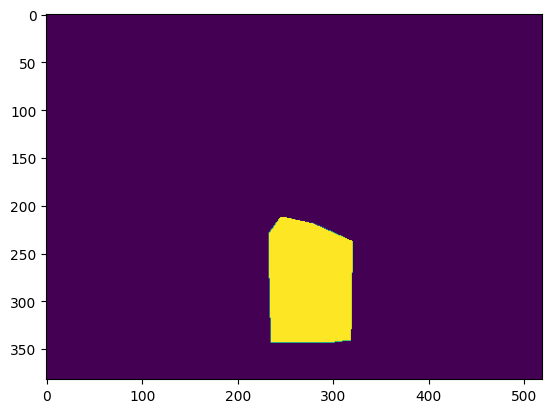

In [11]:
img=io.imread(img_name[-1])
plt.imshow(img)
hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
mask=cv2.inRange(hsv,(100,90,90),(120,255,255))
plt.imshow(mask)
props=measure.regionprops_table(mask,img, spacing=1.2, properties=['label', "area", "equivalent_diameter","mean_intensity","solidity"])
import pandas as pd
df=pd.DataFrame(props)
print(df.head())

   label      area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0    255  27995.04           188.797225         57.421223         57.421223   

   mean_intensity-2  mean_intensity-3  solidity  
0        184.394939             255.0  0.986502  
   label      area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0    255  24209.28           175.568256          51.79586         51.810849   

   mean_intensity-2  mean_intensity-3  solidity  
0        178.169998             255.0  0.989989  
   label     area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0    255  18518.4           153.552464         35.774184         35.784681   

   mean_intensity-2  mean_intensity-3  solidity  
0        161.408787             255.0  0.992744  
   label      area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0    255  15081.12           138.570842         28.930201         28.964576   

   mean_intensity-2  mean_intensity-3  solidity  
0        154.080

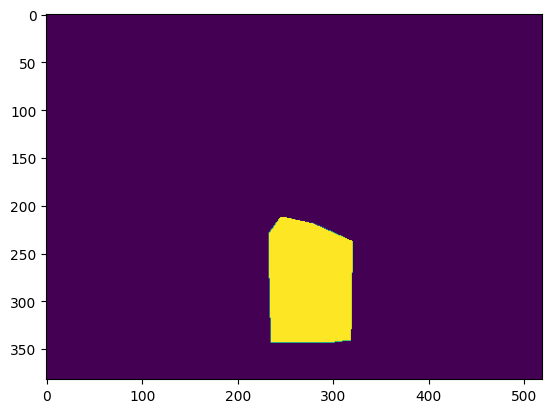

In [10]:
for x in range(len(img_name)):
    img=io.imread(img_name[x])
    plt.imshow(img)
    hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    mask=cv2.inRange(hsv,(100,90,90),(120,255,255))
    plt.imshow(mask)
    props=measure.regionprops_table(mask,img, spacing=1.2, properties=['label', "area", "equivalent_diameter","mean_intensity","solidity"])
    import pandas as pd
    df=pd.DataFrame(props)
    print(df.head())